In [3]:
import asammdf
import pandas as pd
import numpy as np

from asammdf.mdf import MDF

mdf_file = MDF("ZG10000124_Steinach_203498621012_20210506.mdf")

xls is not supported
xlsx is not supported


In [4]:
help(mdf_file)

Help on MDF in module asammdf.mdf object:

class MDF(builtins.object)
 |  MDF(name=None, version='4.10', channels=(), **kwargs)
 |  
 |  Unified access to MDF v3 and v4 files. Underlying _mdf's attributes and
 |  methods are linked to the `MDF` object via *setattr*. This is done to expose
 |  them to the user code and for performance considerations.
 |  
 |  Parameters
 |  ----------
 |  name : string | BytesIO | zipfile.ZipFile | bz2.BZ2File | gzip.GzipFile
 |      mdf file name (if provided it must be a real file name), file-like object or
 |      compressed file opened as Python object
 |  
 |      .. versionchanged:: 6.2.0
 |  
 |          added support for zipfile.ZipFile, bz2.BZ2File and gzip.GzipFile
 |  
 |  version : string
 |      mdf file version from ('2.00', '2.10', '2.14', '3.00', '3.10', '3.20',
 |      '3.30', '4.00', '4.10', '4.11', '4.20'); default '4.10'. This argument is
 |      only used for MDF objects created from scratch; for MDF objects created
 |      from a f

In [7]:
mdf_file.channels

AttributeError: 'MDF3' object has no attribute 'channels'

In [8]:
# using the info method useful information can be retrieved
# for instanve all the groupy and the channels in them
mdf_file.info()

{'author': 'amazone',
 'department': '',
 'project': '',
 'subject': '',
 'version': '3.20',
 'groups': 440,
 'group 0': {'cycles': 121946,
  'comment': 'Python',
  'channels count': 33,
  'channel 0': 'name="time" type=master',
  'channel 1': 'name="ImplementRearWorkLightCmd" type=value',
  'channel 2': 'name="ImplementLeftFacingWorkLightCmd" type=value',
  'channel 3': 'name="ImplementRightFacingWorkLightCmd" type=value',
  'channel 4': 'name="LightingDataRequestCmd" type=value',
  'channel 5': 'name="ImplementLeftForwardLightCmd" type=value',
  'channel 6': 'name="ImplementRightForwardLightCmd" type=value',
  'channel 7': 'name="ImplementOEMOption1LightCmd" type=value',
  'channel 8': 'name="ImplementOEMOption2LightCmd" type=value',
  'channel 9': 'name="TractorFrontHighWorkLightCmd" type=value',
  'channel 10': 'name="TractorFrontLowWorkLightCmd" type=value',
  'channel 11': 'name="TractorSideHighWorkLightCmd" type=value',
  'channel 12': 'name="TractorSideLowWorkLightCmd" type=val

In [9]:
# channels_db gives back channels and in which groups they are present
mdf_file.channels_db

{'time': ((0, 0),
  (1, 0),
  (2, 0),
  (3, 0),
  (4, 0),
  (5, 0),
  (6, 0),
  (7, 0),
  (8, 0),
  (9, 0),
  (10, 0),
  (11, 0),
  (12, 0),
  (13, 0),
  (14, 0),
  (15, 0),
  (16, 0),
  (17, 0),
  (18, 0),
  (19, 0),
  (20, 0),
  (21, 0),
  (22, 0),
  (23, 0),
  (24, 0),
  (25, 0),
  (26, 0),
  (27, 0),
  (28, 0),
  (29, 0),
  (30, 0),
  (31, 0),
  (32, 0),
  (33, 0),
  (34, 0),
  (35, 0),
  (36, 0),
  (37, 0),
  (38, 0),
  (39, 0),
  (40, 0),
  (41, 0),
  (42, 0),
  (43, 0),
  (44, 0),
  (45, 0),
  (46, 0),
  (47, 0),
  (48, 0),
  (49, 0),
  (50, 0),
  (51, 0),
  (52, 0),
  (53, 0),
  (54, 0),
  (55, 0),
  (56, 0),
  (57, 0),
  (58, 0),
  (59, 0),
  (60, 0),
  (61, 0),
  (62, 0),
  (63, 0),
  (64, 0),
  (65, 0),
  (66, 0),
  (67, 0),
  (68, 0),
  (69, 0),
  (70, 0),
  (71, 0),
  (72, 0),
  (73, 0),
  (74, 0),
  (75, 0),
  (76, 0),
  (77, 0),
  (78, 0),
  (79, 0),
  (80, 0),
  (81, 0),
  (82, 0),
  (83, 0),
  (84, 0),
  (85, 0),
  (86, 0),
  (87, 0),
  (88, 0),
  (89, 0),
  (90, 0),
 

In [17]:
signal = mdf_file.select(["Beschleunigung_Y_Bosch"])[0]


df_bosch = pd.DataFrame(data=signal.samples, index=signal.timestamps, columns=["Beschleunigung_Y_Bosch"])

Float64Index([64089.658326, 64681.538221, 73788.628321], dtype='float64')

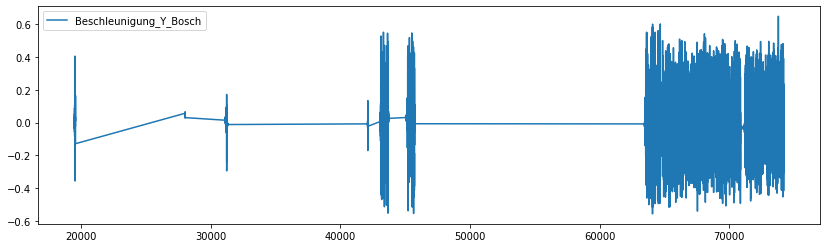

In [20]:
df_bosch.plot(figsize=(14, 4))

df_bosch[df_bosch["Beschleunigung_Y_Bosch"] > 0.6].index

In [14]:
# using select a list of signals can be returned 
mdf_file.select(["MassUnitCmd", "TemperatureUnits"])[0].timestamps

array([19490.559622, 19491.158187, 19491.179557, 19491.385504,
       19493.406606, 19493.431298, 19511.724254, 31149.74061 ,
       31150.312529, 31150.323859, 31150.598874, 31153.323314,
       31153.329362, 31170.575795, 42130.732645, 42131.339473,
       42131.655627, 42131.66555 , 42133.669386, 42133.689924,
       43110.913966, 43111.482248, 43111.492981, 43111.696863,
       43114.499853, 43114.507793, 43133.205791, 45122.139431,
       45122.686867, 45122.801418, 45122.981374, 45124.906023,
       45124.912301, 45147.243928, 63484.099089, 63484.695188,
       63484.813667, 63484.991017, 63486.913631, 63486.916625,
       63512.255053, 71134.374768, 71134.976298, 71135.284633,
       71135.291665, 71137.295189, 71137.303598, 71161.012054])

In [21]:
mdf_file.channels_db

{'time': ((0, 0),
  (1, 0),
  (2, 0),
  (3, 0),
  (4, 0),
  (5, 0),
  (6, 0),
  (7, 0),
  (8, 0),
  (9, 0),
  (10, 0),
  (11, 0),
  (12, 0),
  (13, 0),
  (14, 0),
  (15, 0),
  (16, 0),
  (17, 0),
  (18, 0),
  (19, 0),
  (20, 0),
  (21, 0),
  (22, 0),
  (23, 0),
  (24, 0),
  (25, 0),
  (26, 0),
  (27, 0),
  (28, 0),
  (29, 0),
  (30, 0),
  (31, 0),
  (32, 0),
  (33, 0),
  (34, 0),
  (35, 0),
  (36, 0),
  (37, 0),
  (38, 0),
  (39, 0),
  (40, 0),
  (41, 0),
  (42, 0),
  (43, 0),
  (44, 0),
  (45, 0),
  (46, 0),
  (47, 0),
  (48, 0),
  (49, 0),
  (50, 0),
  (51, 0),
  (52, 0),
  (53, 0),
  (54, 0),
  (55, 0),
  (56, 0),
  (57, 0),
  (58, 0),
  (59, 0),
  (60, 0),
  (61, 0),
  (62, 0),
  (63, 0),
  (64, 0),
  (65, 0),
  (66, 0),
  (67, 0),
  (68, 0),
  (69, 0),
  (70, 0),
  (71, 0),
  (72, 0),
  (73, 0),
  (74, 0),
  (75, 0),
  (76, 0),
  (77, 0),
  (78, 0),
  (79, 0),
  (80, 0),
  (81, 0),
  (82, 0),
  (83, 0),
  (84, 0),
  (85, 0),
  (86, 0),
  (87, 0),
  (88, 0),
  (89, 0),
  (90, 0),
 

In [23]:
# this does not work for signals present in multiple groups
#mdf_file.select(["VehicleSystem2"])

In [24]:
# instead a tuple must be provided that contains signal_name, group_number and channel_number
mdf_file.select([("VehicleSystem2", 76, 1)])

[<Signal VehicleSystem2:
 	samples=[b'Fertilizers' b'Powered Auxiliary Device' b'Fertilizers'
  b'Powered Auxiliary Device' b'Fertilizers' b'Powered Auxiliary Device'
  b'Fertilizers' b'Powered Auxiliary Device' b'Non-specific System'
  b'Non-specific System' b'Fertilizers' b'Powered Auxiliary Device'
  b'Non-specific System' b'Non-specific System' b'Non-specific System'
  b'Fertilizers' b'Powered Auxiliary Device' b'Non-specific System'
  b'Non-specific System' b'Non-specific System' b'Non-specific System'
  b'Fertilizers' b'Non-specific System' b'Fertilizers'
  b'Powered Auxiliary Device' b'Non-specific System' b'Non-specific System'
  b'Non-specific System' b'Fertilizers' b'Fertilizers'
  b'Powered Auxiliary Device' b'Fertilizers' b'Powered Auxiliary Device'
  b'Fertilizers' b'Powered Auxiliary Device' b'Non-specific System'
  b'Fertilizers' b'Powered Auxiliary Device' b'Non-specific System'
  b'Non-specific System' b'Fertilizers' b'Powered Auxiliary Device'
  b'Non-specific System'

In [31]:
mdf_file.select([("VehicleSystem2", 76, 1)], raw=True)[0]

<Signal VehicleSystem2:
	samples=[ 5. 13.  5. 13.  5. 13.  5. 13.  0.  0.  5. 13.  0.  0.  0.  5. 13.  0.
  0.  0.  0.  5.  0.  5. 13.  0.  0.  0.  5.  5. 13.  5. 13.  5. 13.  0.
  5. 13.  0.  0.  5. 13.  0.  0.  0.  5. 13.  0.  0.  0.  0.  5.  5. 13.
  0.  0.  0.  0.  5.  5. 13.  5. 13.  5. 13.  0.  5. 13.  0.  0.  5. 13.
  0.  0.  0.  5. 13.  0.  0.  0.  0.  5.  5. 13.  5. 13.  5. 13.  0.  5.
 13.  0.  0.  5. 13.  0.  0.  0.  5.  0. 13.  0.  0.  0.  5.  0. 13.  5.
  0.  0.  0.  5.  5. 13.  5. 13.  5. 13.  0.  5. 13.  0.  0.  5. 13.  0.
  0.  0.  5. 13.  0.  0.  0.  0.  5.  0.  5.  0. 13.  0.  0.  5.  5. 13.
  5. 13.  5. 13.  0.  5. 13.  0.  0.  5. 13.  0.  0.  0.  5. 13.  0.  0.
  0.  0.  5.  0.  5. 13.  0.  0.  0.  5.  5. 13.  5. 13.  5. 13.  0.  5.
 13.  0.  0.  5. 13.  0.  0.  0.  5. 13.  0.  0.  0.  0.  5.  0.  5. 13.
  0.  0.  0.  5.]
	timestamps=[19487.213683 19487.214253 19487.400013 19487.400602 19487.446117
 19487.446697 19487.696099 19487.696681 19487.751163 19487.999059
 1

In [30]:
mdf_file.select([("VehicleSystem2", 76, 1)])[0]

<Signal VehicleSystem2:
	samples=[b'Fertilizers' b'Powered Auxiliary Device' b'Fertilizers'
 b'Powered Auxiliary Device' b'Fertilizers' b'Powered Auxiliary Device'
 b'Fertilizers' b'Powered Auxiliary Device' b'Non-specific System'
 b'Non-specific System' b'Fertilizers' b'Powered Auxiliary Device'
 b'Non-specific System' b'Non-specific System' b'Non-specific System'
 b'Fertilizers' b'Powered Auxiliary Device' b'Non-specific System'
 b'Non-specific System' b'Non-specific System' b'Non-specific System'
 b'Fertilizers' b'Non-specific System' b'Fertilizers'
 b'Powered Auxiliary Device' b'Non-specific System' b'Non-specific System'
 b'Non-specific System' b'Fertilizers' b'Fertilizers'
 b'Powered Auxiliary Device' b'Fertilizers' b'Powered Auxiliary Device'
 b'Fertilizers' b'Powered Auxiliary Device' b'Non-specific System'
 b'Fertilizers' b'Powered Auxiliary Device' b'Non-specific System'
 b'Non-specific System' b'Fertilizers' b'Powered Auxiliary Device'
 b'Non-specific System' b'Non-specific 

In [25]:
mdf_file.select([("VehicleSystem2", 100, 1)], raw=True)

[<Signal VehicleSystem2:
 	samples=[5. 6. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 0. 5. 5. 5. 5. 5. 5. 5. 5. 5.
  5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 0. 5. 5. 6. 5. 6. 5. 5. 5. 5. 5. 5. 5.
  0. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 0. 5.
  5. 5. 5. 5. 5. 6. 6. 5. 5. 5. 0. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
  5. 5. 5. 5. 5. 5. 5. 0. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 6. 5. 5. 5.
  5. 5. 0. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 0.
  5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 6. 5. 6. 5. 5. 5. 0. 5. 5. 5. 5. 5. 5. 5.
  5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 0. 5. 5. 5. 5.
  5. 6. 5. 6. 5. 5. 0. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
  5. 5. 5. 5. 5. 5. 5. 5. 0. 5. 5. 5. 5. 5. 5. 5. 6. 5. 6. 5. 5. 5. 5. 5.
  5. 5. 5. 5. 5. 5. 5. 0. 5. 5. 5. 5. 5. 5. 5. 5. 5. 0. 5. 5. 5. 5. 5. 5.
  5. 5. 5. 5. 5. 5. 5. 6.]
 	timestamps=[19495.120672 19495.121789 19495.122352 19495.122894 19495.123441
  19495.123992 19495.124554 19495.125099 19495

In [33]:
mdf_file.select(['Beschleunigung_Z_Bosch'], raw=False)

[<Signal Beschleunigung_Z_Bosch:
 	samples=[0.99445505 0.99713182 0.99917126 ... 0.99534731 0.99815153 0.99636702]
 	timestamps=[19468.698159 19468.717731 19468.737742 ... 74233.451061 74233.471067
  74233.491268]
 	invalidation_bits=None
 	unit="g"
 	conversion=None
 	source=None
 	comment=""
 	mastermeta="('time', 1)"
 	raw=False
 	display_name=
 	attachment=()>]

In [34]:
# with ignore_value2text_conversions one can convert only numeric signals
# and leaves non-numeric signals raw
mdf_file.select(
    [("VehicleSystem2", 76, 1), "Beschleunigung_Z_Bosch"], 
    raw=False, 
    ignore_value2text_conversions=True 
)

[<Signal VehicleSystem2:
 	samples=[ 5. 13.  5. 13.  5. 13.  5. 13.  0.  0.  5. 13.  0.  0.  0.  5. 13.  0.
   0.  0.  0.  5.  0.  5. 13.  0.  0.  0.  5.  5. 13.  5. 13.  5. 13.  0.
   5. 13.  0.  0.  5. 13.  0.  0.  0.  5. 13.  0.  0.  0.  0.  5.  5. 13.
   0.  0.  0.  0.  5.  5. 13.  5. 13.  5. 13.  0.  5. 13.  0.  0.  5. 13.
   0.  0.  0.  5. 13.  0.  0.  0.  0.  5.  5. 13.  5. 13.  5. 13.  0.  5.
  13.  0.  0.  5. 13.  0.  0.  0.  5.  0. 13.  0.  0.  0.  5.  0. 13.  5.
   0.  0.  0.  5.  5. 13.  5. 13.  5. 13.  0.  5. 13.  0.  0.  5. 13.  0.
   0.  0.  5. 13.  0.  0.  0.  0.  5.  0.  5.  0. 13.  0.  0.  5.  5. 13.
   5. 13.  5. 13.  0.  5. 13.  0.  0.  5. 13.  0.  0.  0.  5. 13.  0.  0.
   0.  0.  5.  0.  5. 13.  0.  0.  0.  5.  5. 13.  5. 13.  5. 13.  0.  5.
  13.  0.  0.  5. 13.  0.  0.  0.  5. 13.  0.  0.  0.  0.  5.  0.  5. 13.
   0.  0.  0.  5.]
 	timestamps=[19487.213683 19487.214253 19487.400013 19487.400602 19487.446117
  19487.446697 19487.696099 19487.696681 19487.751163 

In [35]:
# using get the same can be accomplished for a single signal
mdf_file.get("Beschleunigung_Z_Bosch")

<Signal Beschleunigung_Z_Bosch:
	samples=[0.99445505 0.99713182 0.99917126 ... 0.99534731 0.99815153 0.99636702]
	timestamps=[19468.698159 19468.717731 19468.737742 ... 74233.451061 74233.471067
 74233.491268]
	invalidation_bits=None
	unit=""
	conversion=None
	source=None
	comment=""
	mastermeta="('time', 1)"
	raw=False
	display_name=
	attachment=()>

In [38]:
# get_group allows group access
df = mdf_file.get_group(1)

In [42]:
df["time"] = df.index
df

,TX1_MSG_CNT,TX1_CLU_STAT,Beschleunigung_Y_Bosch,Gierrate,TX1_PSIP1_STAT,TX1_AY1_STAT,time
timestamps,,,,,,,
0.000000,2.0,0.0,0.010298,-0.195,b'SignalInSpecification',b'SignalInSpecification',0.000000
0.018725,3.0,0.0,0.007366,-0.210,b'SignalInSpecification',b'SignalInSpecification',0.018725
0.038732,4.0,0.0,0.012082,-0.225,b'SignalInSpecification',b'SignalInSpecification',0.038732
0.058726,5.0,0.0,0.005582,-0.195,b'SignalInSpecification',b'SignalInSpecification',0.058726
0.078736,6.0,0.0,0.004944,-0.195,b'SignalInSpecification',b'SignalInSpecification',0.078736
...,...,...,...,...,...,...,...
54764.712068,9.0,0.0,-0.008567,0.000,b'SignalInSpecification',b'SignalInSpecification',54764.712068
54764.732073,10.0,0.0,-0.013538,0.000,b'SignalInSpecification',b'SignalInSpecification',54764.732073
54764.752079,11.0,0.0,-0.011371,-0.015,b'SignalInSpecification',b'SignalInSpecification',54764.752079


In [43]:
df["time"].values

array([0.00000000e+00, 1.87250000e-02, 3.87320000e-02, ...,
       5.47647521e+04, 5.47647721e+04, 5.47647923e+04])

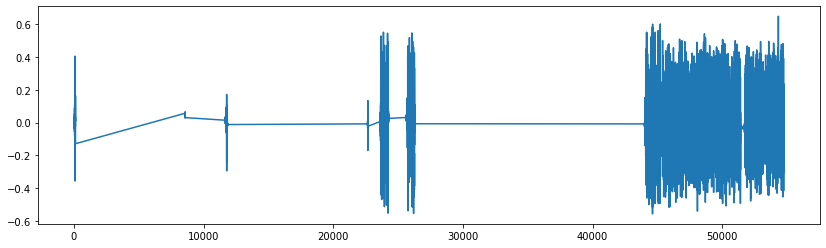

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 4))
plt.plot(df["time"].values, df["Beschleunigung_Y_Bosch"].values )
plt.show()

<AxesSubplot:xlabel='timestamps'>

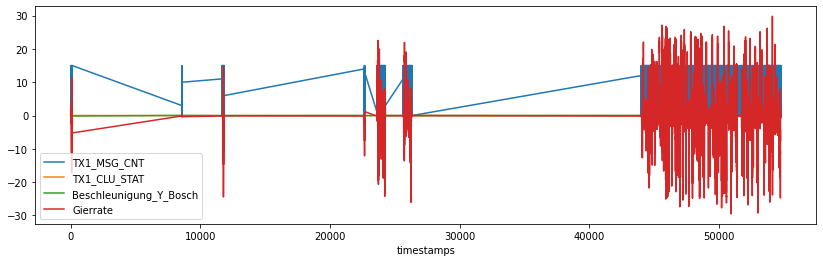

In [40]:
df[["TX1_MSG_CNT", "TX1_CLU_STAT", "Beschleunigung_Y_Bosch", "Gierrate"]].plot(figsize=(14, 4))

In [53]:
for group in mdf_file.groups:
    print(group.channel_group)

In [52]:
help(group.channel_group)

Help on ChannelGroup in module asammdf.blocks.v2_v3_blocks object:

class ChannelGroup(builtins.object)
 |  ChannelGroup(**kwargs)
 |  
 |  CGBLOCK class
 |  
 |  CGBLOCK fields
 |  
 |  * ``id`` - bytes : block ID; always b'CG'
 |  * ``block_len`` - int : block bytes size
 |  * ``next_cg_addr`` - int : next CGBLOCK address
 |  * ``first_ch_addr`` - int : address of first channel block (CNBLOCK)
 |  * ``comment_addr`` - int : address of TXBLOCK that contains the channel
 |    group comment
 |  * ``record_id`` - int : record ID used as identifier for a record if
 |    the DGBLOCK defines a number of record IDs > 0 (unsorted group)
 |  * ``ch_nr`` - int : number of channels
 |  * ``samples_byte_nr`` - int : size of data record in bytes without
 |    record ID
 |  * ``cycles_nr`` - int : number of cycles (records) of this type in the data
 |    block
 |  * ``sample_reduction_addr`` - int : addresss to first sample reduction
 |    block
 |  
 |  Other attributes
 |  
 |  * ``address`` - in

In [17]:
mdf_file.get_group(10)

,Strom_Wiegezelle3_HL,Strom_Wiegezelle2_VR,Strom_Wiegezelle1_VL
timestamps,,,
0.000000,6.418,5.114,4.939
0.019811,6.427,5.116,4.945
0.039805,6.420,5.108,4.949
0.059798,6.427,5.115,4.950
0.079970,6.413,5.102,4.952
...,...,...,...
54764.698020,6.427,5.114,4.964
54764.718224,6.423,5.111,4.953
54764.738222,6.425,5.112,4.954


In [18]:
mdf_file.info()

{'author': 'amazone',
 'department': '',
 'project': '',
 'subject': '',
 'version': '3.20',
 'groups': 440,
 'group 0': {'cycles': 121946,
  'comment': 'Python',
  'channels count': 33,
  'channel 0': 'name="time" type=master',
  'channel 1': 'name="ImplementRearWorkLightCmd" type=value',
  'channel 2': 'name="ImplementLeftFacingWorkLightCmd" type=value',
  'channel 3': 'name="ImplementRightFacingWorkLightCmd" type=value',
  'channel 4': 'name="LightingDataRequestCmd" type=value',
  'channel 5': 'name="ImplementLeftForwardLightCmd" type=value',
  'channel 6': 'name="ImplementRightForwardLightCmd" type=value',
  'channel 7': 'name="ImplementOEMOption1LightCmd" type=value',
  'channel 8': 'name="ImplementOEMOption2LightCmd" type=value',
  'channel 9': 'name="TractorFrontHighWorkLightCmd" type=value',
  'channel 10': 'name="TractorFrontLowWorkLightCmd" type=value',
  'channel 11': 'name="TractorSideHighWorkLightCmd" type=value',
  'channel 12': 'name="TractorSideLowWorkLightCmd" type=val

In [19]:
mdf_file.channels_db

{'time': ((0, 0),
  (1, 0),
  (2, 0),
  (3, 0),
  (4, 0),
  (5, 0),
  (6, 0),
  (7, 0),
  (8, 0),
  (9, 0),
  (10, 0),
  (11, 0),
  (12, 0),
  (13, 0),
  (14, 0),
  (15, 0),
  (16, 0),
  (17, 0),
  (18, 0),
  (19, 0),
  (20, 0),
  (21, 0),
  (22, 0),
  (23, 0),
  (24, 0),
  (25, 0),
  (26, 0),
  (27, 0),
  (28, 0),
  (29, 0),
  (30, 0),
  (31, 0),
  (32, 0),
  (33, 0),
  (34, 0),
  (35, 0),
  (36, 0),
  (37, 0),
  (38, 0),
  (39, 0),
  (40, 0),
  (41, 0),
  (42, 0),
  (43, 0),
  (44, 0),
  (45, 0),
  (46, 0),
  (47, 0),
  (48, 0),
  (49, 0),
  (50, 0),
  (51, 0),
  (52, 0),
  (53, 0),
  (54, 0),
  (55, 0),
  (56, 0),
  (57, 0),
  (58, 0),
  (59, 0),
  (60, 0),
  (61, 0),
  (62, 0),
  (63, 0),
  (64, 0),
  (65, 0),
  (66, 0),
  (67, 0),
  (68, 0),
  (69, 0),
  (70, 0),
  (71, 0),
  (72, 0),
  (73, 0),
  (74, 0),
  (75, 0),
  (76, 0),
  (77, 0),
  (78, 0),
  (79, 0),
  (80, 0),
  (81, 0),
  (82, 0),
  (83, 0),
  (84, 0),
  (85, 0),
  (86, 0),
  (87, 0),
  (88, 0),
  (89, 0),
  (90, 0),
 

In [55]:
df = mdf_file.to_dataframe(
    channels=["sig_Finaler_Abwurfwinkel_M2", 
              "sig_S9_Versorgungsspannung", 
              "WheelBasedMachineDistance", 
              "WheelBasedMachineSpeed"]
)
df

,sig_Finaler_Abwurfwinkel_M2,sig_S9_Versorgungsspannung,WheelBasedMachineDistance,WheelBasedMachineSpeed
timestamps,,,,
0.000000,-0.1,0.0,0.0,0.0
0.001502,-0.1,0.0,0.0,0.0
0.064383,-0.1,0.0,0.0,0.0
0.101623,-0.1,0.0,0.0,0.0
0.200004,-0.1,0.0,0.0,0.0
...,...,...,...,...
54764.256182,-13.0,0.0,15999.0,0.0
54764.453888,-13.0,0.0,15999.0,0.0
54764.456719,-13.0,0.0,15999.0,0.0


<AxesSubplot:xlabel='timestamps'>

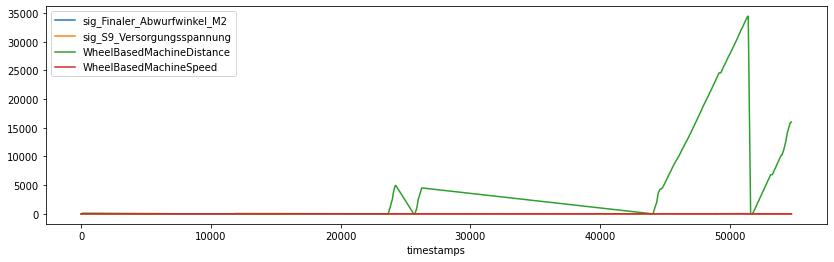

In [56]:
df.plot(figsize=(14, 4))

In [22]:
df = mdf_file.get_group(10)

<AxesSubplot:xlabel='timestamps'>

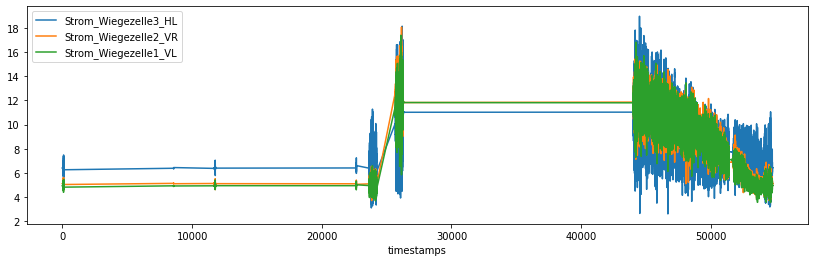

In [23]:
df.plot(figsize=(14, 4))

In [57]:
df = mdf_file.get_group(10)


In [59]:
df.to_csv("my_mdf_file.csv")

In [60]:
df.to_parquet("my_parquet_mdf_file.parquet")

In [62]:
mdf_file.export(filename="export.parquet", fmt="csv")

KeyboardInterrupt: 

# Exercises

1. Wähle eine Gruppe mit mehreren numerischen Spalten und berechne für jede Spalte Mittelwert und Standardabweichung.

2. Wähle eine Gruppe mit mehrere kategoriellen (string Werten) Spalten aus und berechne wie oft welcher Wert auftritt.

3. Wähle eine Gruppe mit mehreren numerischen Spalten und erstelle einen Plot der Verläufe.

4. Wähle eine Gruppe mit mehreren numerischen Spalten und bilde Mittelwert und Standardabweichung für ein von dir festgelegtes Zeitfenster.